In [84]:
# -- IMPORTS -- #
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
from keras.layers import Dense
from keras.preprocessing import image as kerasImage
from PIL import Image as pilImage
from scipy.ndimage.filters import gaussian_filter, median_filter
%matplotlib inline
import matplotlib.pyplot as plt
import keras.backend as K
import imageio
import random
import subprocess
import numpy as np
from glob import glob
import os

In [13]:
# -- DEFINE FUNCTIONS -- #
def load_image(path,targetSize=(224,224),preprocess=True):
    data = kerasImage.load_img(path,target_size=targetSize)
    if preprocess:
        data = kerasImage.img_to_array(data)
        data = np.expand_dims(data,axis=0)
        #data = preprocess_input(data)
    return data

def deprocess_image(x):
    x -= x.mean(); x /= (x.std() + K.epsilon()); x *= 0.1
    # CLIP DATA
    x += 0.5; x = np.clip(x, 0, 1)
    # CONVERT TO RGB
    x *= 255; x = np.clip(x, 0, 255).astype('uint8')
    return x

In [3]:
# Take simonyans results and pass it to the model to see what it predicts
model = VGG16(weights='imagenet',include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


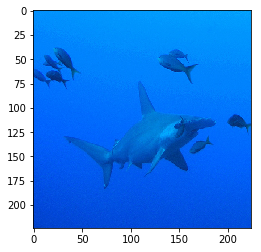

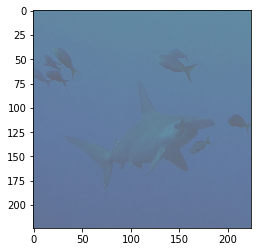

0.9961261 hammerhead


In [82]:
imgData = load_image('./Results/Classic/Class_308.png',preprocess=False)
imgInput = load_image('./Data/images/test_5.jpg',preprocess=False)
plt.imshow(imgInput)
plt.show()
imgData = kerasImage.img_to_array(imgData)
imgData = (np.expand_dims(imgData,axis=0)+np.random.normal(0,100,(1,224,224,3)))*0.1
imgInput = kerasImage.img_to_array(imgInput)
imgInput = np.expand_dims(imgInput,axis=0)*4
Mix = imgInput+imgData
plt.imshow(deprocess_image(Mix[0].copy()))
plt.show()
pred = model.predict(Mix)
decoded = decode_predictions(pred)[0]
print(decoded[0][2],decoded[0][1])

In [81]:
pred = model.predict(imgData)
decoded = decode_predictions(pred)[0]
print(decoded[0][2],decoded[0][1])

0.3839345 lacewing


In [115]:
# DATA POINTS
tauList = glob('./Data/Taurons/*.jpg')
tarList = glob('./Data/Tarantulas/*.jpg')
tau2List = glob('./Data/Taurons2/*.jpg')
print(len(tauList),len(tarList),len(tau2List))
class1 = []
class2 = []
class12 = []
for k in range(len(tauList)):
    class1.append(load_image(tauList[k]))
    class2.append(load_image(tarList[k]))
    class12.append(load_image(tau2List[k]))

5 5 5


In [89]:
layerOutputs = []
layerNames = []
for layer in model.layers:
    if layer.__class__.__name__ == 'Conv2D':
        layerOutputs.append(layer.output)
        layerNames.append(layer.name)
visual = Model(inputs=model.input,outputs=layerOutputs)

In [113]:
#DIFFERENT CLASSES CONVOLUTION
RMSdiff = []
RMSmean = []
for k in range(len(tauList)):
    act1 = visual.predict(class1[k]); act1 = act1[-1]
    act2 = visual.predict(class2[k]); act2 = act2[-1]
    numFilters = act1.shape[-1]
    for l in range(numFilters):
        im1 = act1[0,:,:,l]
        im2 = act2[0,:,:,l]
        RMSdiff.append(np.sqrt(np.mean((im1-im2)**2)))
    RMSmean.append(np.mean(np.array(RMSdiff)))
    RMSdiff.clear()
print(RMSmean)
print(np.mean(np.array(RMSmean)))

[5.8744583, 6.8163033, 6.8031607, 8.900595, 6.8844514]
7.055794


In [122]:
#DIFFERENT CLASSES LAST LAYER
RMSdiff = []
for k in range(len(tauList)):
    act1 = model.predict(class1[k])[0]
    act2 = model.predict(class2[k])[0]
    RMSdiff.append(np.sqrt(np.mean(np.array((act1-act2)**2))))
print(RMSdiff)
print(np.mean(np.array(RMSdiff)))

[0.03026412, 0.029619113, 0.026260994, 0.036682617, 0.03147096]
0.03085956


In [116]:
# SAME CLASSES CONVOLUTION
RMSdiff = []
RMSmean = []
for k in range(len(tauList)):
    act1 = visual.predict(class1[k]); act1 = act1[-1]
    act2 = visual.predict(class12[k]); act2 = act2[-1]
    numFilters = act1.shape[-1]
    for l in range(numFilters):
        im1 = act1[0,:,:,l]
        im2 = act2[0,:,:,l]
        RMSdiff.append(np.sqrt(np.mean((im1-im2)**2)))
    RMSmean.append(np.mean(np.array(RMSdiff)))
    RMSdiff.clear()
print(RMSmean)
print(np.mean(np.array(RMSmean)))

[7.6978083, 6.526657, 7.6255946, 6.2177086, 5.651201]
6.7437935


In [124]:
RMSdiff = []
for k in range(len(tauList)):
    act1 = model.predict(class1[k])[0]
    act2 = model.predict(class12[k])[0]
    RMSdiff.append(np.sqrt(np.mean(np.array((act1-act2)**2))))
print(RMSdiff)
print(np.mean(np.array(RMSdiff)))

[0.029412305, 0.040310625, 0.024948005, 0.015349204, 0.019236935]
0.025851414


In [1]:
# -- LYING TO VGG16 -- #
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image as kerasImage
%matplotlib inline
import matplotlib.pyplot as plt
import keras.backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
# -- DEFINE FUNCTIONS -- #
def load_image(path,targetSize=(224,224),preprocess=True):
    data = kerasImage.load_img(path,target_size=targetSize)
    if preprocess:
        data = kerasImage.img_to_array(data)
        data = np.expand_dims(data,axis=0)
        data = preprocess_input(data)
    return data

def deprocess_image(x):    
    x -= x.mean(); x /= (x.std() + K.epsilon()); x *= 0.25
    # CLIP DATA
    x += 0.5; x = np.clip(x, 0, 1)
    # CONVERT TO RGB
    x *= 255; x = np.clip(x, 0, 255).astype('uint8')
    return x

In [3]:
# -- DEFINE MODEL -- #
model = VGG16(weights='imagenet',include_top=True)
prediction = model.outputs[0]
imgInput = model.inputs[0]

Instructions for updating:
Colocations handled automatically by placer.


Select the class you want to optimize 308


In [14]:
# -- DEFINE LOSS & GRADIENT -- #
selClass = int(input('Select the class you want to optimize'))
size = model.input_shape[1:][0]
loss = prediction[0,selClass]
grads = K.gradients(loss,imgInput)[0]
iterate = K.function([imgInput],[loss,grads])

Select the class you want to optimize 3


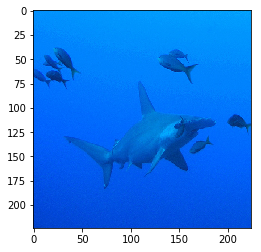

Select the number of iterations:  50


COMPUTE:
------
0.023741666
------
0.07849145
------
0.07849498
------
0.07849632
------
0.078495964
------
DONE


In [19]:
# -- COMPUTE HACKED IMAGE -- #
plt.imshow(rawImage)
plt.show()
imgData = load_image('./Data/images/test_5.jpg')
maxChange = imgData + 0.05
minChange = imgData - 0.05
learningRate = 80000
epochs = int(input('Select the number of iterations: '))
print('COMPUTE:\n------')
#lossVal = 0.0
#k = 0
for k in range(epochs):
#while lossVal < 0.8:
    lossVal,gradVal = iterate([imgData])
    imgData += gradVal*learningRate
    imgData = np.clip(imgData, minChange, maxChange)
    imgData = np.clip(imgData, 0, 255)
    #k += 1
    if k % 10 == 0:
        print(lossVal)
        print('------')
print('DONE')

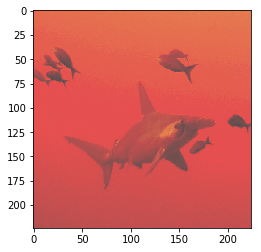

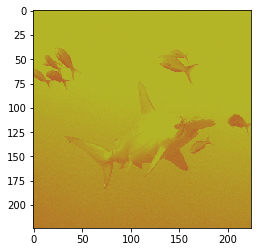

0.74898595 hammerhead
0.8884745 hammerhead


In [23]:
# -- SHOW HACKED IMAGE AND PREDICTED -- #
imgRaw = load_image('./Data/images/test_5.jpg')
noise = imgRaw-imgData
plt.imshow(deprocess_image(imgData[0].copy()))
plt.show()
plt.imshow(deprocess_image(noise[0].copy()))
plt.show()
pred = model.predict(imgData)
decoded = decode_predictions(pred)[0]
print(decoded[0][2],decoded[0][1])
pred = model.predict(imgRaw)
decoded = decode_predictions(pred)[0]
print(decoded[0][2],decoded[0][1])

In [24]:
pred = model.predict(imgData)
decoded = decode_predictions(pred)[0]
print(decoded)

[('n01494475', 'hammerhead', 0.74898595), ('n01484850', 'great_white_shark', 0.12375906), ('n01491361', 'tiger_shark', 0.07849698), ('n01496331', 'electric_ray', 0.00832268), ('n01664065', 'loggerhead', 0.006135031)]
